In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import preprocessing

## Preprocessing and temporal scaling

In [2]:
X, y, class_names = preprocessing.create_data_tensor()

/home/parth/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:2223: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/parth/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:2225: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  Y[sl] = X[sl]
/home/parth/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:2233: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted a

In [3]:
print('Dimensions of X:', X.shape)
print('Possible Classes:', class_names.values())

Dimensions of X: (2565, 22, 57)
Possible Classes: dict_values(['make', 'polite', 'draw', 'soon', 'money', 'cost', 'when', 'innocent', 'pen', 'name', 'know', 'paper', 'no', 'I', 'tray', 'research', 'computer_PC_', 'ready', 'God', 'what', 'wait_notyet_', 'building', 'yes', 'different', 'sad', 'man', 'right', 'later', 'all', 'hurry', 'his_hers', 'hear', 'danger', 'eat', 'drink', 'share', 'thank', 'you', 'temper', 'juice', 'hurt', 'wild', 'please', 'give', 'come', 'glove', 'forget', 'more', 'which', 'shop', 'lose', 'maybe', 'stubborn', 'question', 'where', 'sorry', 'spend', 'girl', 'Norway', 'write', 'science', 'zero', 'buy', 'happy', 'hot', 'not', 'take', 'will', 'head', 'go', 'is_true_', 'think', 'why', 'deaf', 'answer', 'surprise', 'how', 'read', 'love', 'flash', 'boy', 'voluntary', 'hello', 'cold', 'change_mind_', 'mine', 'crazy', 'responsible', 'who', 'joke', 'same', 'wrong', 'alive', 'us', 'exit'])


In [4]:
X_flat = preprocessing.flatten_data(X)
print('Dimensions of X after flattening: ', X_flat.shape)

Dimensions of X after flattening:  (2565, 1254)


## Logistic Regression

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.3)
print('Training set dimensions: ', X_train.shape)
print('Test set dimensions: ', X_test.shape)

Training set dimensions:  (1795, 1254)
Test set dimensions:  (770, 1254)


In [6]:
log_reg_model = LogisticRegression(C=10.0, max_iter=100)
log_reg_model.fit(X_train, y_train)

/home/parth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/parth/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [7]:
y_train_predict = log_reg_model.predict(X_train)
y_test_predict = log_reg_model.predict(X_test)

## Evaluation

In [8]:
print('Training Set Accuracy: ', metrics.accuracy_score(y_train, y_train_predict))
print('Test Set Accuracy: ', metrics.accuracy_score(y_test, y_test_predict))

Training Set Accuracy:  1.0
Test Set Accuracy:  0.938961038961039


In [9]:
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9
           2       0.91      0.83      0.87        12
           3       0.67      0.86      0.75         7
           4       1.00      0.92      0.96        12
           5       0.78      0.88      0.82         8
           6       0.71      1.00      0.83         5
           7       0.88      0.78      0.82         9
           8       0.75      0.75      0.75         4
           9       1.00      1.00      1.00         8
          10       1.00      0.75      0.86         4
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         6
          13       1.00      0.75      0.86         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         8
          17       1.00    

## Confusion Matrix

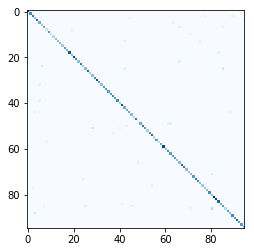

In [14]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import confusion_matrix

plt.imshow(confusion_matrix(y_test, y_test_predict), cmap=cm.Blues)